# The Hydrogen Atom

The hydrogen atom is composed of an electron and a proton.  If these two particles were classical, the interaction energy would simply be described by the Coulombic attraction between the two particles

$V(r) = -\frac{e^2}{4\pi\epsilon_0r}$,

where $r$ is the separation distance between the two particles, $e$ is the charge of an electron and $\epsilon_0$ is the permittivity of free space. In the quantum mechanical picture, we will treat this same function as the potential energy operator.  The Hamiltonian for a hydrogen atom is then, including the kinetic energy,

$\hat{H} = -\frac{\hbar^2}{2m_e}\nabla^2-\frac{e^2}{4\pi\epsilon_0r}$

where $m_e$ is the mass of an electron and $\nabla^2$ is the Laplacian in three dimensions.  Notice that this Hamiltonian is only in terms of the coordinates of the electron relative to the heavy proton.  

Since the potential is a function of $r$, the separation distance between the proton and the electron, it is useful to write the Laplacian in spherical coordinates. Recall from the rigid rotator that

$\nabla^2_{r\theta\phi} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) + \frac{1}{r^2\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{r^2\sin^2\theta}\frac{\partial^2}{\partial^2\phi}$

Plugging this back into the Schrodinger equation yields

$\hat{H}\Psi(r,\theta,\phi) = -\frac{\hbar^2}{2m_e}\left[\frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) + \frac{1}{r^2\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{r^2\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right]\Psi(r,\theta,\phi) +V(r)\Psi(r,\theta,\phi) = E\Psi(r,\theta,\phi)$ 

Multiply through by $2m_er^2$ to get

$-\hbar^2\left[\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) + \frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right]\Psi(r,\theta,\phi) +2m_er^2V(r)\Psi(r,\theta,\phi) = 2m_er^2E\Psi(r,\theta,\phi)$

Rearrange (combine terms dependent on $r$) to get

$-\hbar^2\left[\frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right]\Psi(r,\theta,\phi) -\hbar^2\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)\Psi(r,\theta,\phi)+2m_er^2\left(V(r)-E\right)\Psi(r,\theta,\phi) =0$

Notice that the left-hand term in the above equality is the $\hat{L}^2\Psi$ thus yielding

$\hat{L}^2\Psi(r,\theta,\phi) -\hbar^2\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)\Psi(r,\theta,\phi)+2m_er^2\left(V(r)-E\right)\Psi(r,\theta,\phi) =0$.

Now notice that only the left-hand term depends on $\theta$ and $\phi$ and only the two right-hand terms depend on $r$ thus allowing us to write

$\Psi(r,\theta,\phi) = R(r)Y(\theta,\phi)$,

where

$\hat{L}^2Y(\theta,\phi) = E_{\theta,\phi}Y(\theta,\phi) \tag{1}$

and 

$-\frac{\hbar^2}{2m_er^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r)+\left[\frac{E_{\theta,\phi}}{2m_er^2} + V(r)-E\right]R(r) =0 \tag{2} $.

We know the solutions to equation (1) above from the rigid rotator.  Namely

$\hat{L}^2Y(\theta,\phi) = \hbar^2l(l+1)Y_l^{m_l}(\theta,\phi)$

for $l=0,1,2...$ and $-l\leq m_l \leq l$.  $Y_l^{m_l}(\theta,\phi)$ are the spherical harmonics where it is customary to write them in terms of $l$ and $m_l$ for the hydrogen atom instead of $J$ and $m_J$ for the rigid rotator.  

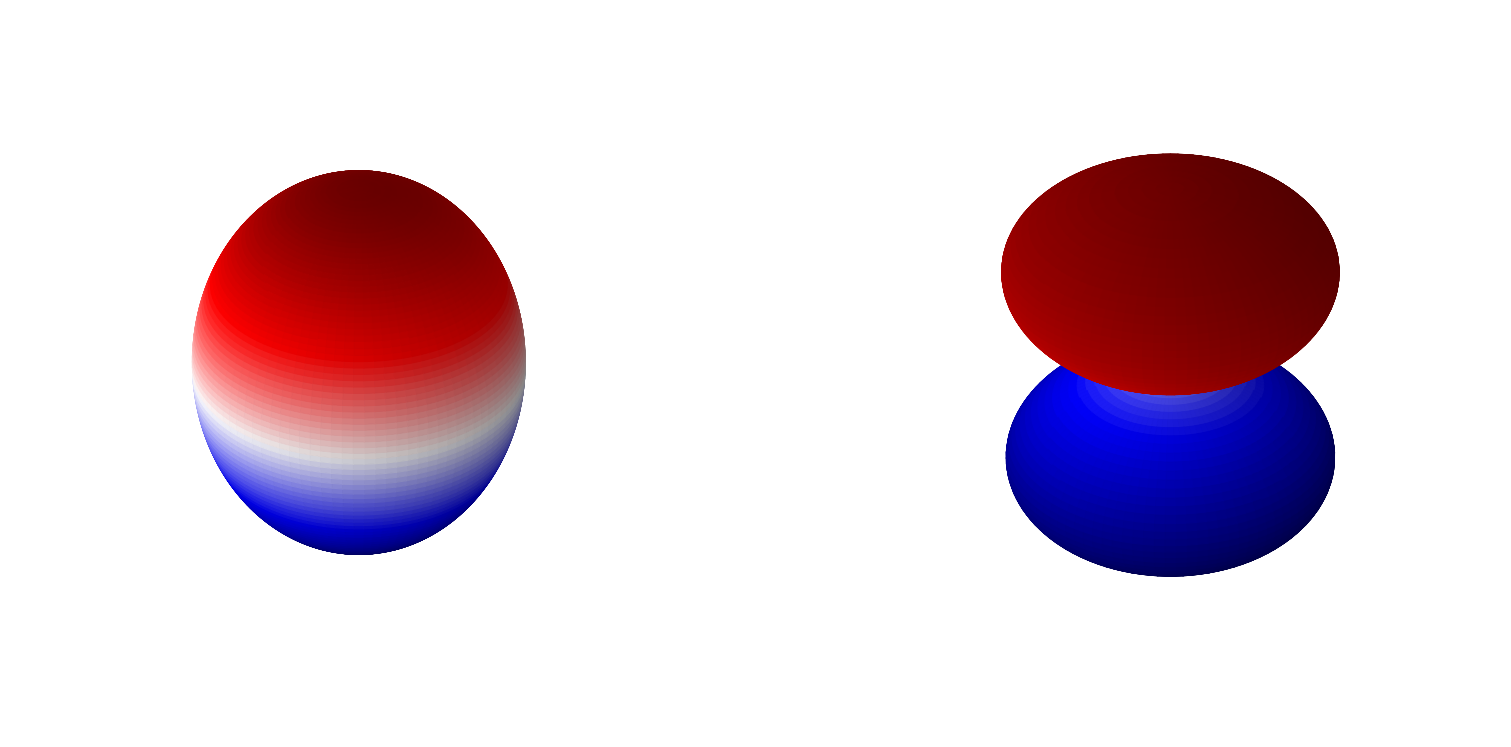

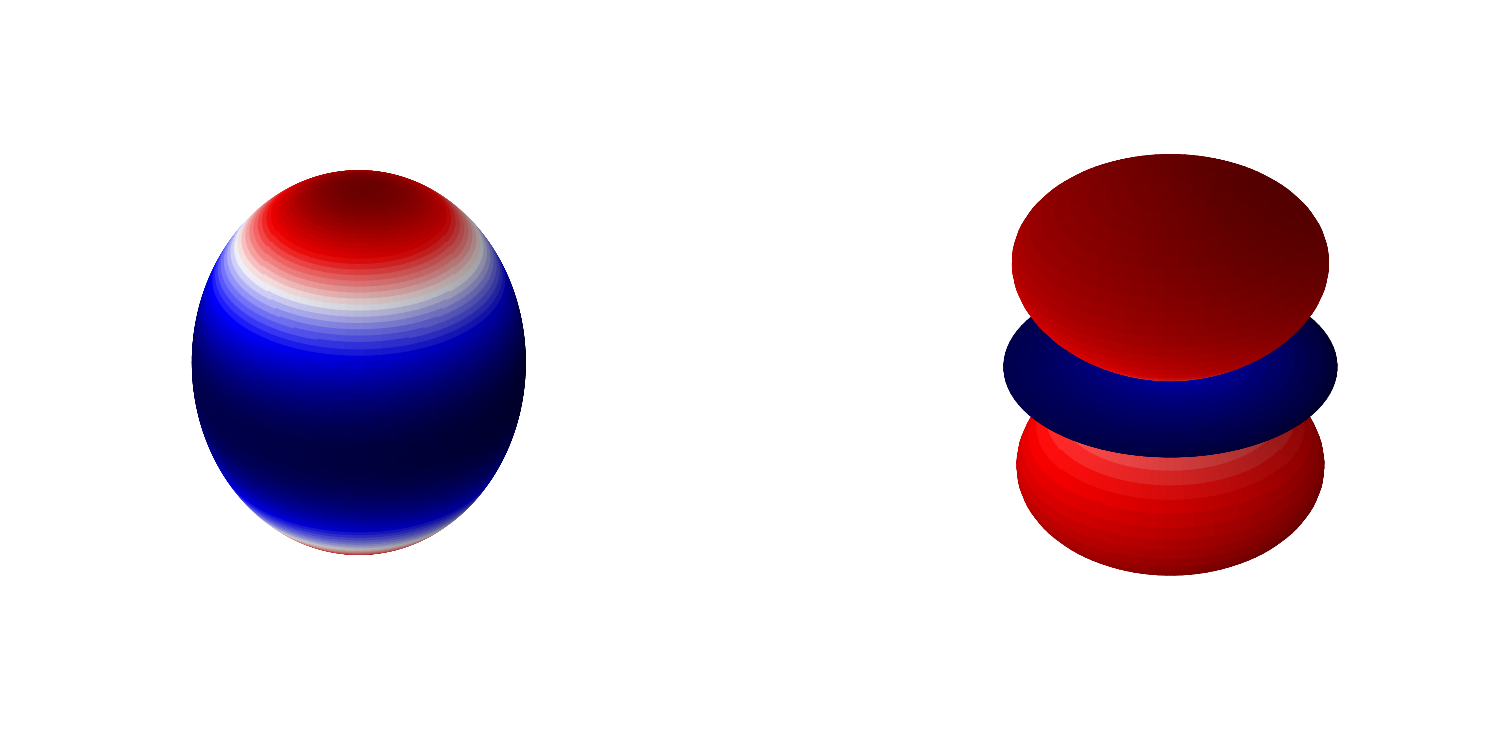

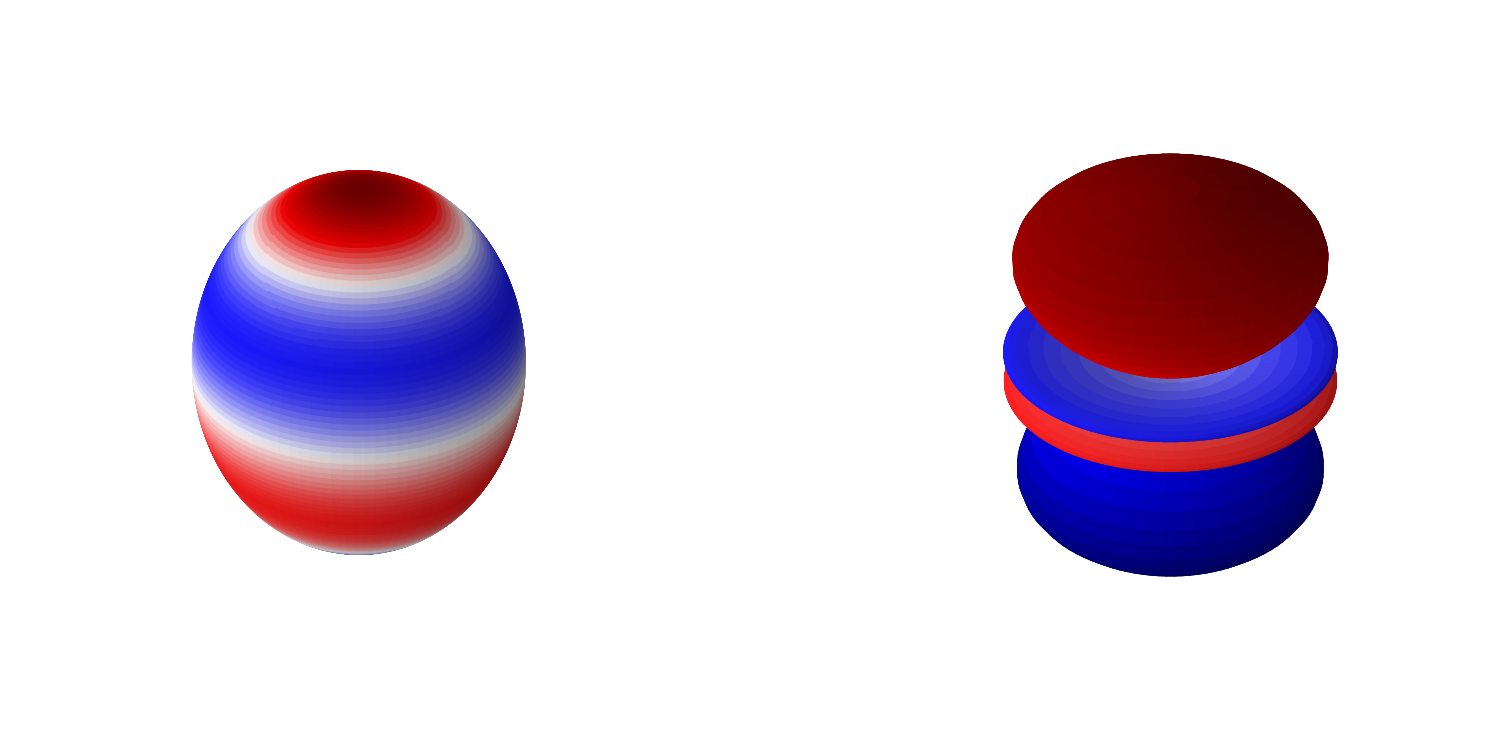

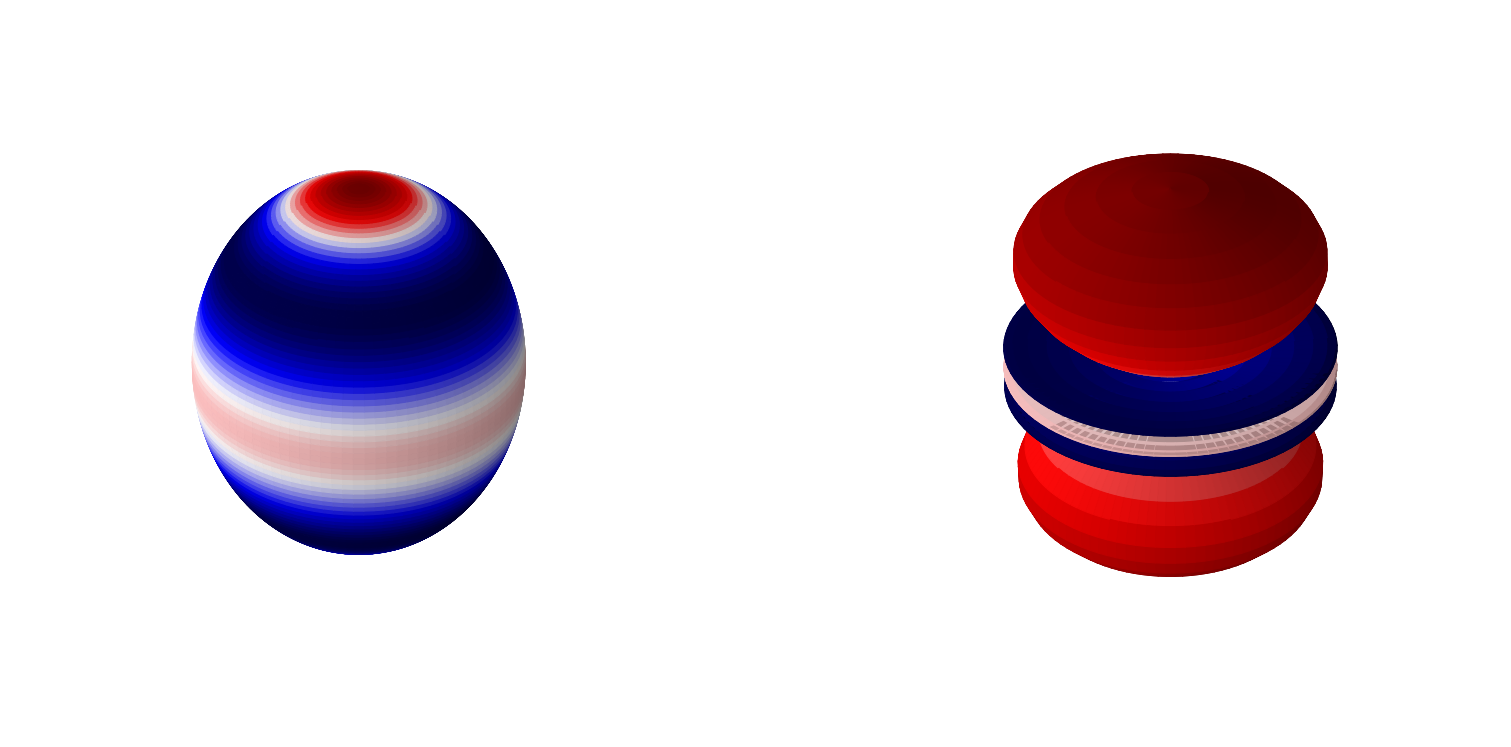

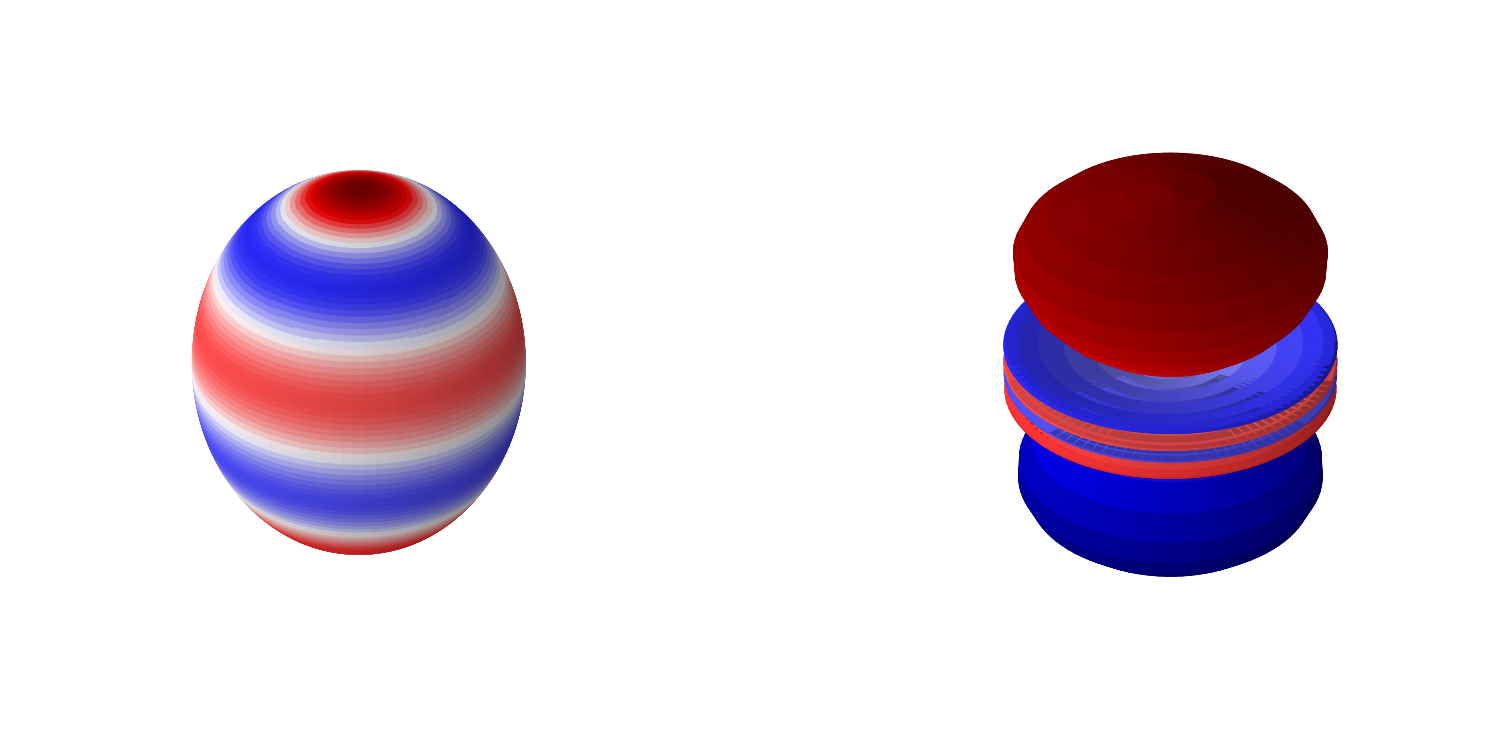

In [23]:
# recall what the spherical harmonics look like
# make two plots of the same spherical harmonic
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import sph_harm
def plot_spherical_harmonic(m,l,theta=np.linspace(0,np.pi,100),phi=np.linspace(0,2*np.pi,100)):
    THETA, PHI = np.meshgrid(theta, phi)
    X = np.sin(THETA) * np.cos(PHI)
    Y = np.sin(THETA) * np.sin(PHI)
    Z = np.cos(THETA)
    # Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
    fcolors = sph_harm(m, l, PHI, THETA).real
    s = np.power(sph_harm(m, l, PHI, THETA).real,2)
    s /= s.max()
    fmax, fmin = fcolors.max(), fcolors.min()
    fcolors = (fcolors - fmin)/(fmax - fmin)
    

    # Set the aspect ratio to 1 so our sphere looks spherical
    fig = plt.figure(figsize=(24,12),dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
    ax.set_axis_off()
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(X*s, Y*s, Z*s,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
    # Turn off the axis planes
    ax.set_axis_off()

plt.show()
plot_spherical_harmonic(0,1)
plot_spherical_harmonic(0,2)
plot_spherical_harmonic(0,3)
plot_spherical_harmonic(0,4)
plot_spherical_harmonic(0,5)

We must now substitute $E_{\theta,\phi}=\hbar^2l(l+1)$ into equation (2) above and solve for the radial part

$-\frac{\hbar^2}{2m_er^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right)R(r)+\left[\frac{\hbar^2l(l+1)}{2m_er^2} + V(r)-E\right]R(r) =0 $.

This can be solved but we will not go through it. Instead we will present the energies and wavefunctions

$E_n = - \frac{m_ee^4}{8\epsilon_0^2h^2n^2} = - \frac{e^2}{8\pi\epsilon_0a_0n^2}$

for $n=1,2,...$ and $a_0 = \frac{\epsilon_0h^2}{\pi m_ee^2}$ is the Bohr radius.  These are actually the same energies obtained from the Bohr model of the hydrogen atom.  Also notice that the energies are independent of $l$.  It should be noted that $n\geq l+1 $ or $0 \leq l \leq n-1$ for $n=1,2,..$.  

The radial wavefunction solution to the equation above is given as 

$R_{nl} = -\left[ \frac{(n-l-1)!}{2n[(n+l)!]^3}\right]^{1/2} \left( \frac{2}{na_0}\right)^{l+3/2} r^le^{-r/na_0}L_{n+1}^{2l+1}\left( \frac{2r}{na_0}\right)$,

where $L_{n+l}^{2l+1}$ are the *associated Laguerre polynomials*.  Note that we will plot these functions in terms of the  *generalized Laguerre polynomials* which requires us to replace $L_{n+l}^{2l+1}$  in the above equation with $L_{n-l-1}^{2l+1}$ (this is now the generalized form) and remove a factor of $(n+l)!$:

$R_{nl} = -\left[ \frac{(n-l-1)!}{2n(n+l)!}\right]^{1/2} \left( \frac{2}{na_0}\right)^{l+3/2} r^le^{-r/na_0}L_{n-l-1}^{2l+1}\left( \frac{2r}{na_0}\right)$,

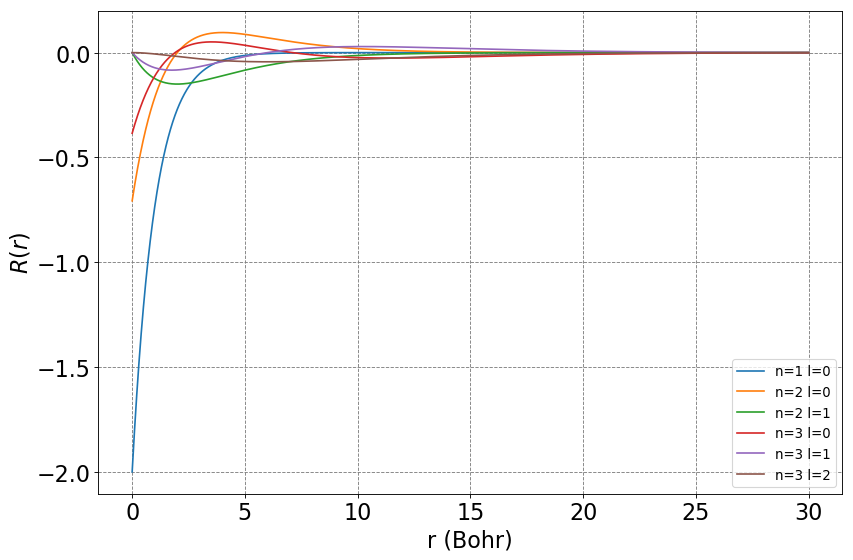

In [3]:
# let's plot some radial wavefunctions of the hydrogen atom
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import factorial
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import plotting as myplt
%matplotlib inline

fig, ax = myplt.define_figure(xlabel="r (Bohr)", ylabel="$R(r)$")

# parameters for plotting
nLimit = 3
a0 = 1.0
r = np.arange(0,30,0.01)

for n in range(1,nLimit+1):
    for l in range(n):
        prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
        R = prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
        label = "n=" + str(n) + " l=" + str(l)
        ax.plot(r,R,label=label)
plt.legend(fontsize=12)
plt.show()

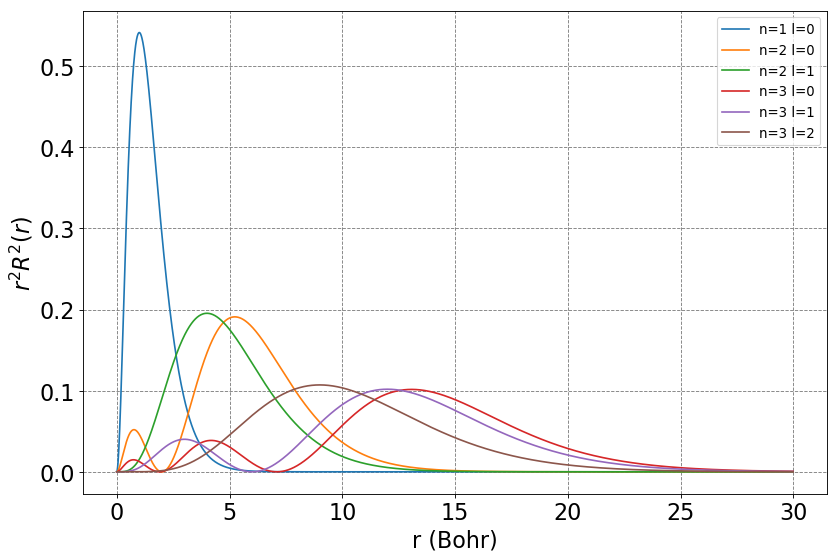

In [2]:
# let's plot some radial wavefunctions of the hydrogen atom
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import factorial
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import plotting as myplt
%matplotlib inline

fig, ax = myplt.define_figure(xlabel="r (Bohr)", ylabel="$r^2R^2(r)$")

# parameters for plotting
nLimit = 3
a0 = 1.0
r = np.arange(0,30,0.01)

for n in range(1,nLimit+1):
    for l in range(n):
        prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
        R = prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
        label = "n=" + str(n) + " l=" + str(l)
        ax.plot(r,np.power(R,2)*np.power(r,2),label=label)
plt.legend(fontsize=12)
plt.show()

The complete hydrogen atom wavefunctions are a product of the radial and angular components

$\psi_{nlm_l}(r,\theta,\phi) = R_{nl}(r)Y_l^{m_l}(\theta,\phi)$

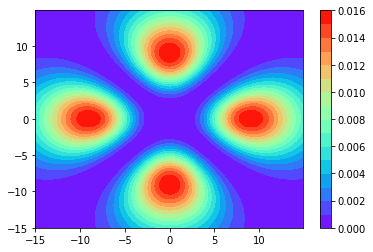

In [10]:
# recall what the spherical harmonics look like
# make two plots of the same spherical harmonic
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import factorial
a0 = 1
def h_atom_r_prob(n,l,r):
    prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
    R = prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
    return np.power(r,2)*np.power(R,2)
def h_atom_theta_phi_prob(l,m,theta,phi):
    y = sph_harm(m, l, phi, theta).real
    return y*y

def plot_h_atom_prob_xy_xz(n,l,m):
    xi = np.arange(-15,15,0.1)
    yi = np.arange(-15,15,0.1)
    zi = np.arange(-15,15,0.1)
    
    r = np.sqrt(np.power(xi,2)+np.power(yi,2))
    theta1 = np.zeros(xi.size,dtype=float)
    theta2 = np.arccos(zi/np.sqrt(np.power(xi,2)+np.power(zi,2)))
    phi1 = np.arctan(yi/xi)
    
    X,Y = np.meshgrid(xi,yi)
    probxy = np.empty(X.shape,dtype=float)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            r = np.sqrt(X[i,j]**2+Y[i,j]**2)
            phi = np.arctan(Y[i,j]/X[i,j])
            #print r, phi, h_atom_r_prob(n,l,r), h_atom_theta_phi_prob(l,m,np.pi/2.0,phi)
            probxy[i,j] = h_atom_r_prob(n,l,r)*h_atom_theta_phi_prob(l,m,np.pi/2.0,phi)
    
    # Create the contour plot
    zmax = np.amax(probxy)
    zmin = np.amin(probxy)
    CS = plt.contourf(X, Y, probxy, 15, cmap=plt.cm.rainbow, vmax=zmax, vmin=zmin)
    plt.colorbar()  
    plt.show()
    
    
    

plot_h_atom_prob_xy_xz(n=3,l=2,m=2)

In [1]:
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

xi = np.arange(-10,10,0.1)
yi = np.arange(-10,10,0.1)
zi = np.arange(-10,10,0.1)

X,Y,Z = np.meshgrid(xi,yi,zi)

R = np.sqrt(np.power(X,2)+np.power(Y,2)+np.power(Z,2))
THETA = Z / R
PHI = Y / X

prob = h_atom_r_prob(n,l,R)*h_atom_theta_phi_prob(l,m,THETA,PHI)

verts, faces, blah, blah = measure.marching_cubes(prob, 0.01, spacing=(0.1, 0.1, 0.1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)

ImportError: No module named skimage

In [4]:
#selection rules
from scipy import integrate
nLimit = 3
a0 = 1.0
r = np.arange(0,30,0.01)

for n1 in range(1,nLimit+1):
    for l1 in range(n1):
        prefactor1 = -np.sqrt(factorial(n1-l1-1)/(2*n1*factorial(n1+l1)))*(2.0/(n1*a0))**(l1+1.5)*np.power(r,l1)*np.exp(-r/(n1*a0))
        R1 = prefactor1*eval_genlaguerre(n1-l1-1,2*l1+1,2*r/(n1*a0))
        for n2 in range(1,nLimit+1):
            for l2 in range(n2):
                prefactor2 = -np.sqrt(factorial(n2-l2-1)/(2*n2*factorial(n2+l2)))*(2.0/(n2*a0))**(l2+1.5)*np.power(r,l2)*np.exp(-r/(n2*a0))
                R2 = prefactor*eval_genlaguerre(n2-l2-1,2*l2+1,2*r/(n2*a0))
                selection = integrate.simps(R1*np.power(r,3)*R2,r)
                print("<",n1,l1,"|r|",n2,l2,"> = ", selection)

< 1 0 |r| 1 0 > =  0.3851174232442131
< 1 0 |r| 2 0 > =  -0.9627935580681646
< 1 0 |r| 2 1 > =  0.3851174232442131
< 1 0 |r| 3 0 > =  -0.2888380676801717
< 1 0 |r| 3 1 > =  0.3851174232724586
< 1 0 |r| 3 2 > =  0.3851174232442131
< 2 0 |r| 1 0 > =  -5.939336848555927
< 2 0 |r| 2 0 > =  40.751915349184785
< 2 0 |r| 2 1 > =  -5.939336848555927
< 2 0 |r| 3 0 > =  -29.214132258024623
< 2 0 |r| 3 1 > =  11.329711969974054
< 2 0 |r| 3 2 > =  -5.939336848555927
< 2 1 |r| 1 0 > =  4.747962431986855
< 2 1 |r| 2 0 > =  -30.38628475348793
< 2 1 |r| 2 1 > =  4.747962431986855
< 2 1 |r| 3 0 > =  19.557018003009727
< 2 1 |r| 3 1 > =  -7.596290017027006
< 2 1 |r| 3 2 > =  4.747962431986855
< 3 0 |r| 1 0 > =  9.467817536463858
< 3 0 |r| 2 0 > =  -122.75448601549655
< 3 0 |r| 2 1 > =  9.467817536463858
< 3 0 |r| 3 0 > =  238.67988900888992
< 3 0 |r| 3 1 > =  -56.588810579760754
< 3 0 |r| 3 2 > =  9.467817536463858
< 3 1 |r| 1 0 > =  -10.04738274458085
< 3 1 |r| 2 0 > =  120.29715465244726
< 3 1 |r| 2 1